In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, RobustScaler, QuantileTransformer, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [97]:
# read the dataset
df=pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [98]:
# encode the categorical parameters
df['sex'] = df['sex'].map({'male':1,'female':0})
df['smoker'] = df['smoker'].map({'yes':1, 'no':0 })
le = LabelEncoder()
df['region'] = le.fit_transform(df['region'])
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


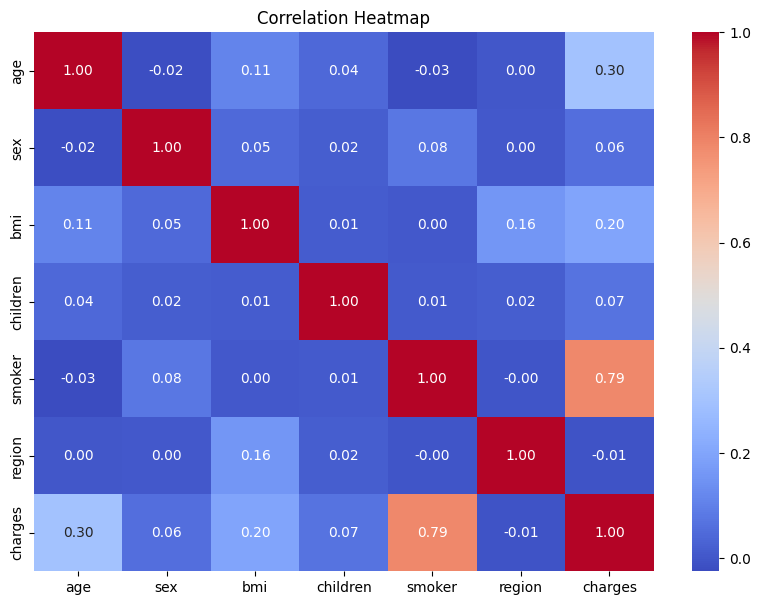

In [99]:
# perform correlation analysis
numeric_cols=['age','sex','bmi','children','smoker','region','charges']
corr = df[numeric_cols].corr()

plt.figure(figsize=(10, 7))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [100]:
# retain the top-3 features only
target_corr = corr['charges'].abs()

# Sort and select top-k features (excluding the target itself)
top_k = target_corr.drop('charges').sort_values(ascending=False).head(3)  # top 3 features
print(top_k)

smoker    0.787251
age       0.299008
bmi       0.198341
Name: charges, dtype: float64


In [101]:
# divide the dataset into independent and dependent variables
X=df[['smoker','age','bmi','children','sex','region']]
y=df['charges']

In [102]:
# training and testing split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (936, 6)
X_test shape: (402, 6)
y_train shape: (936,)
y_test shape: (402,)


In [103]:
# scale and transform the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [104]:
# train the model
model = LinearRegression()
model.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [105]:
# analyse the importance of each feature
coef = pd.DataFrame(model.coef_,X.columns,columns=['Coef'])
coef

,Coef
smoker,9592.796018
age,3693.224192
bmi,2064.855878
children,514.327856
sex,54.805573
region,-363.359336


In [106]:
# make predictions
y_pred = model.predict(X_test);

# compute the metrics
mse = mean_squared_error(y_test,y_pred)
r2s = r2_score(y_test,y_pred)
rmse = np.sqrt(mse)

print("MSE : ",mse)
print("R2 : ",r2s)
print("RMSE : ",rmse)

MSE :  33805466.89868862
R2 :  0.7694415927057692
RMSE :  5814.246890069996


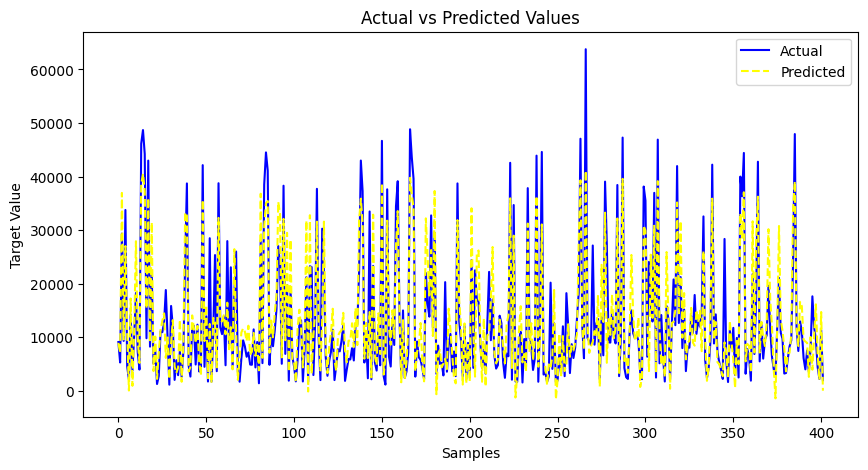

In [107]:
plt.figure(figsize=(10,5))

plt.plot(y_test.values, label="Actual", color='blue')

plt.plot(y_pred, label="Predicted", color='yellow', linestyle='--')

plt.title("Actual vs Predicted Values")
plt.xlabel("Samples")
plt.ylabel("Target Value")
plt.legend()
plt.show()

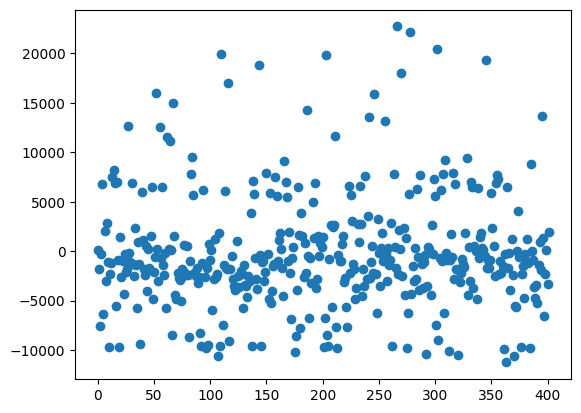

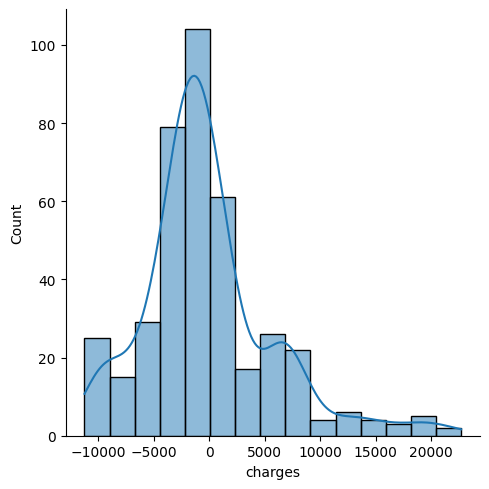

In [108]:
# scatter plot
residuals = y_test-y_pred
plt.scatter(np.arange(y_test.size),residuals)
sns.displot(residuals,bins=15,kde=True) ## near normal distribution of residuals
plt.show()